In [1]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import wave
#import pyaudio
import numpy as np
#import sounddevice as sd
from utils import *
import scipy
from scipy.signal import iirnotch, filtfilt
from glob import glob
import neurokit2 as nk

In [3]:
subject_dirs = glob('/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/*')
subject_dirs

['/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_physio.h5',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/P5882302_20240918_113453.mff',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_ses-S001_task-CUNY_run-001_mobi.xdf',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_behavior.psydat',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_eyes.csv',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_video.avi',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_behavior.csv',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_task-CUNY_run-001_behavior.log',
 '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_ses-S001_task-CUNY_run-001_mic.wav']

# Load Data

In [4]:
xdf_filename = '/Users/apurva.gokhe/Documents/CUNY_QC/data/sub-P5882302/sub-P5882302_ses-S001_task-CUNY_run-001_mobi.xdf'
subject = xdf_filename.split('-')[1].split('/')[0]
ps_df = get_event_data(event='RestingState',
                    df=import_physio_data(xdf_filename),
                    stim_df=import_stim_data(xdf_filename))

## ECG

<Axes: xlabel='time', ylabel='ECG1'>

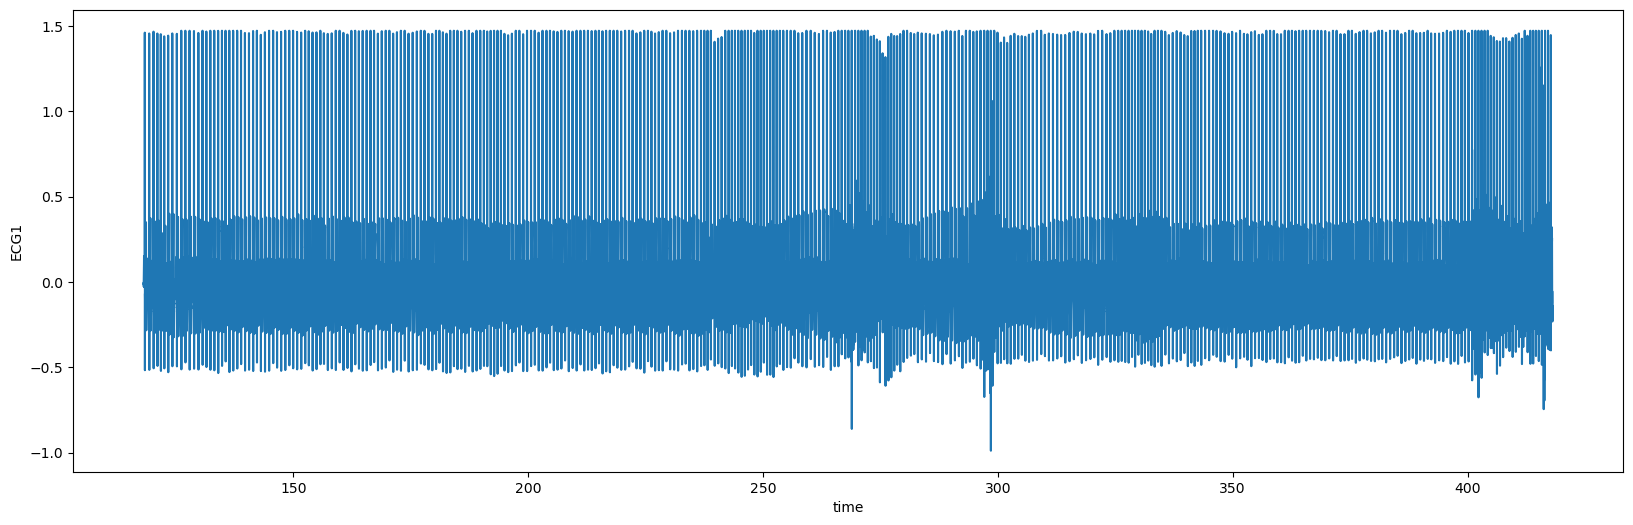

In [6]:
ecg_df = ps_df[['ECG1', 'lsl_time_stamp', 'time']]
sampling_rate = 1 / (ecg_df.lsl_time_stamp.diff().mean())
#ecg_resting_state = get_event_data('RestingState', ecg_df)
fig, ax = plt.subplots(figsize=(20,6))
sns.lineplot(data=ecg_df, x='time', y='ECG1')


### QC using neurokit2 package

#### ecg_process() - automated pipeline for preprocessing ECG signal, cleaning uses neurokit method

In [7]:
ecg_signals, info = nk.ecg_process(ecg_df['ECG1'], sampling_rate=sampling_rate)
ecg_signals

,ECG_Raw,ECG_Clean,ECG_Rate,ECG_Quality,ECG_R_Peaks,ECG_P_Peaks,ECG_P_Onsets,ECG_P_Offsets,ECG_Q_Peaks,ECG_R_Onsets,ECG_R_Offsets,ECG_S_Peaks,ECG_T_Peaks,ECG_T_Onsets,ECG_T_Offsets,ECG_Phase_Atrial,ECG_Phase_Completion_Atrial,ECG_Phase_Ventricular,ECG_Phase_Completion_Ventricular
0,-0.02192,-0.025670,76.809528,0.877042,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
1,-0.01923,-0.025151,76.809528,0.877042,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
2,-0.01869,-0.024642,76.809528,0.877042,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
3,-0.02022,-0.024151,76.809528,0.877042,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
4,-0.02013,-0.023660,76.809528,0.877042,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299931,-0.16190,-0.078406,100.649725,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299932,-0.16325,-0.076736,100.649725,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299933,-0.16864,-0.074945,100.649725,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0
299934,-0.16514,-0.073060,100.649725,0.000000,0,0,0,0,0,0,0,0,0,0,0,NaN,0.0,NaN,0.0


### Heartrate

In [20]:
average_heartrate = sum(ecg_signals['ECG_Rate'])/len(ecg_signals['ECG_Rate'])
print('Average Heart Rate: ', average_heartrate)

Average Heart Rate:  76.83019697439083


### ECG report plot 

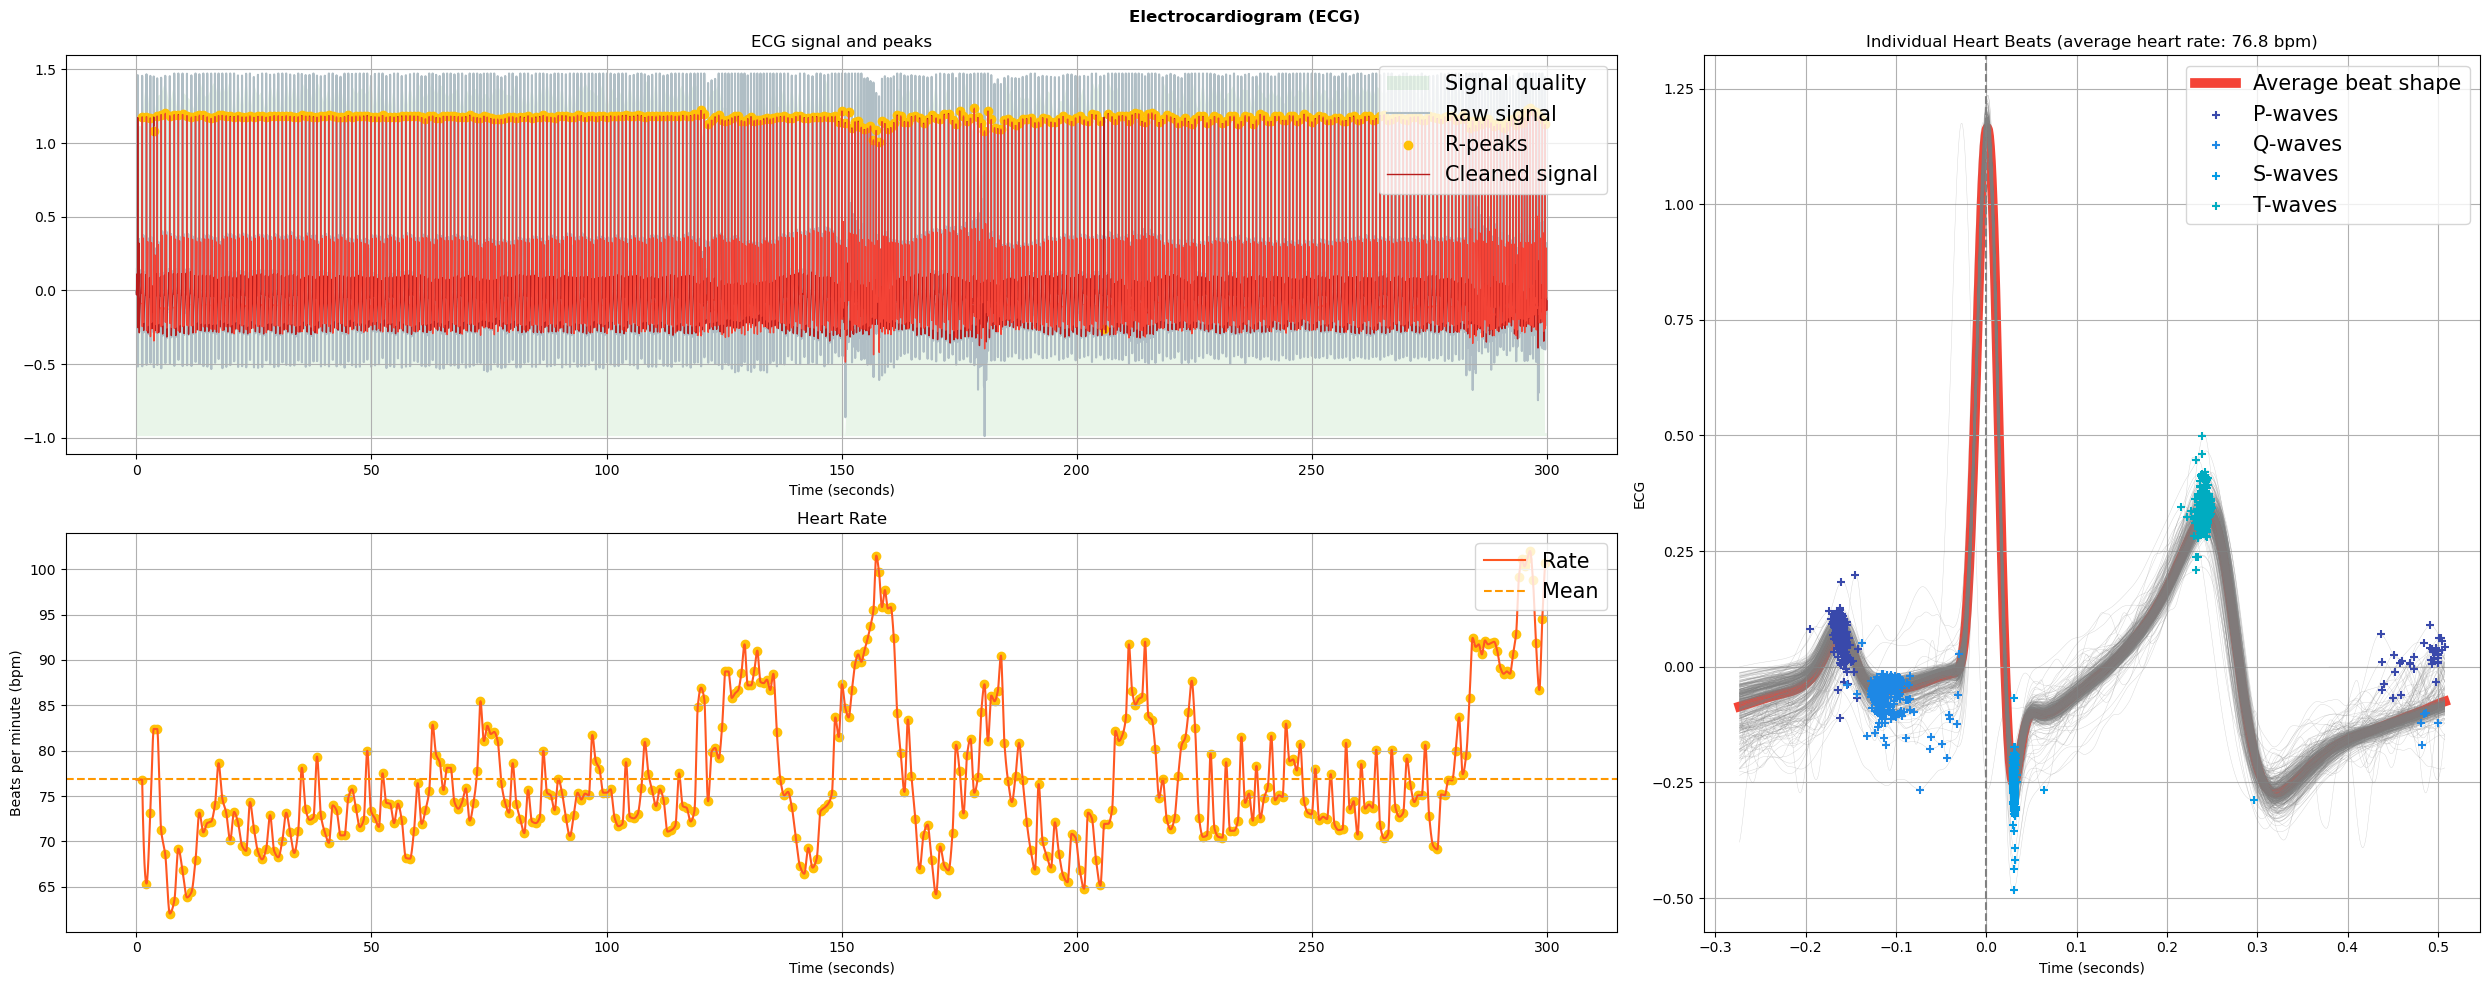

In [9]:
nk.ecg_plot(ecg_signals, info)
# Get the current figure and axes
fig = plt.gcf()
axes = fig.get_axes()
fig.set_size_inches(25, 10)
# Adjust layout to prevent overlap
plt.tight_layout()

# Iterate over each axis and move the legend
for i, ax in enumerate(axes):
    if i == 0:  # Check if it is the first plot (index 0)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15)  # Move legend outside the plot
    elif i == 1:  # Check if it is the second plot (index 1)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15)  # Move legend outside the plot
    elif i == 2:  # Check if it is the third plot (index 2)
        ax.legend(loc='upper right', bbox_to_anchor=(1, 1), fontsize=15)  # Move legend to the right
    else:
        ax.legend(loc='center right', bbox_to_anchor=(1, 0.5), fontsize=15)  # Default position for other plots


# Add grid for better readability
for ax in axes:
    ax.grid(True)

# Show the plot
plt.show()

### Extract SQI values from ecg_quality() function - kSQI, pSQI, basSQI

In [12]:
def _ecg_quality_kurtosis_SQI(ecg_cleaned, method="fisher"):
    """Return the kurtosis of the signal, with Fisher's or Pearson's method."""

    if method == "fisher":
        return scipy.stats.kurtosis(ecg_cleaned, fisher=True)
    elif method == "pearson":
        return scipy.stats.kurtosis(ecg_cleaned, fisher=False)

kurtosis_SQI = _ecg_quality_kurtosis_SQI(ecg_signals['ECG_Clean'], method='fisher')
print('kurtosis_SQI value is: ', kurtosis_SQI)

kurtosis_SQI value is:  9.447244789650231


In [13]:
from neurokit2.signal import signal_power

def _ecg_quality_psd_SQI(
    ecg_cleaned,
    sampling_rate=1000,
    window=1024,
    num_spectrum=[5, 15],
    dem_spectrum=[5, 40],
    **kwargs
):
    """Power Spectrum Distribution of QRS Wave."""

    psd = signal_power(
        ecg_cleaned,
        sampling_rate=sampling_rate,
        frequency_band=[num_spectrum, dem_spectrum],
        method="welch",
        normalize=False,
        window=window,
        **kwargs
    )

    num_power = psd.iloc[0, 0]
    dem_power = psd.iloc[0, 1]

    return num_power / dem_power

psd_SQI = _ecg_quality_psd_SQI(ecg_signals['ECG_Clean'], sampling_rate=sampling_rate)
print('psd_SQI value is: ', psd_SQI)

psd_SQI value is:  0.7386379549179496


In [14]:
from neurokit2.signal import signal_power

def _ecg_quality_baseline_power_SQI(
    ecg_cleaned,
    sampling_rate=1000,
    window=1024,
    num_spectrum=[0, 1],
    dem_spectrum=[0, 40],
    **kwargs
):
    """Relative Power in the Baseline."""
    psd = signal_power(
        ecg_cleaned,
        sampling_rate=sampling_rate,
        frequency_band=[num_spectrum, dem_spectrum],
        method="welch",
        normalize=False,
        window=window,
        **kwargs
    )

    num_power = psd.iloc[0, 0]
    dem_power = psd.iloc[0, 1]

    return (1 - num_power) / dem_power

baseline_power_SQI = _ecg_quality_baseline_power_SQI(ecg_signals['ECG_Clean'], sampling_rate=sampling_rate)
print('baseline_power_SQI value is: ', baseline_power_SQI)

baseline_power_SQI value is:  19.117550897069933


### SNR calculation for ECG

Signal Power: 0.05227408539246486
Noise Power: 0.0063880123321918576
SNR: 9.129206970907621 dB


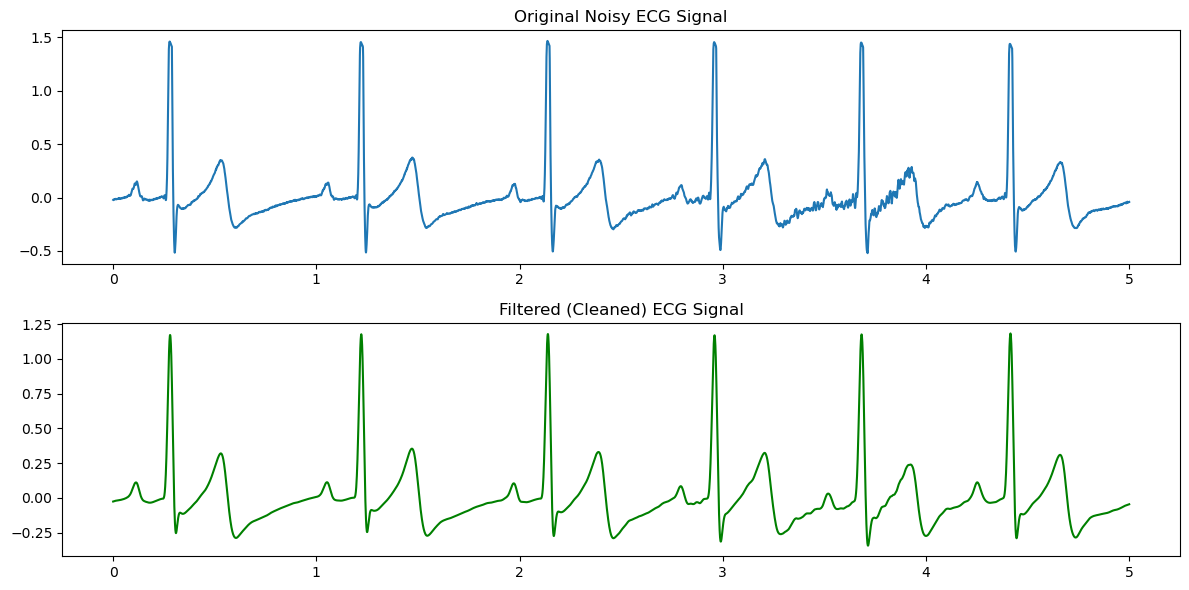

In [ ]:
duration = len(ecg_df['ECG1'].tolist()) / sampling_rate
t = np.linspace(0, duration , len(ecg_df['ECG1']))
t = t[:5000]

# Clean ECG from ecg_signals dataframe
ecg_cleaned = ecg_signals['ECG_Clean'] 

# Calculate signal power (variance of the cleaned ECG signal)
signal_power = np.var(ecg_cleaned)

# Calculate signal power (mean of squared values)
#signal_power = np.mean(ecg_cleaned**2)

# Estimate noise power (using residual noise after subtracting cleaned signal from raw noisy signal)
noise_signal = ecg_signals['ECG_Raw'] - ecg_cleaned  # residual noise
noise_power = np.var(noise_signal)
# Calculate noise power (mean of squared values)
#noise_power = np.mean(noise_signal**2)

# Calculate SNR (Signal-to-Noise Ratio in dB)
snr = 10 * np.log10(signal_power / noise_power)

# Output the results
print(f"Signal Power: {signal_power}")
print(f"Noise Power: {noise_power}")
print(f"SNR: {snr} dB")

# Plot the original noisy signal and the cleaned ECG signal for visualization
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(t, ecg_df['ECG1'].tolist()[:5000], label="Noisy ECG")
plt.title("Original Noisy ECG Signal")
plt.subplot(2, 1, 2)
plt.plot(t, ecg_cleaned[:5000], label="Cleaned ECG", color='g')
plt.title("Filtered (Cleaned) ECG Signal")
plt.tight_layout()
plt.show()
